# 逻辑回归预测IPO市场

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from patsy import dmatrix
from tkinter import _flatten  
%matplotlib inline

In [2]:
sp = pd.read_csv('spy_new.csv')
sp.sort_values('Date', inplace=True)
sp.reset_index(drop=True, inplace=True)

sp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...,...
4011,2015-12-11,2047.270020,2047.270020,2008.800049,2012.369995,2012.369995,4301060000
4012,2015-12-14,2013.369995,2022.920044,1993.260010,2021.939941,2021.939941,4612440000
4013,2015-12-15,2025.550049,2053.870117,2025.550049,2043.410034,2043.410034,4353540000
4014,2015-12-16,2046.500000,2076.719971,2042.430054,2073.070068,2073.070068,4635450000


In [3]:
all_dates = sp[['Date']]
tkr_index = [x for x in all_dates.index if x % 15 == 0]
all_dates.iloc[tkr_index,:]

,Date
0,2000-01-03
15,2000-01-25
30,2000-02-15
45,2000-03-08
60,2000-03-29
...,...
3945,2015-09-09
3960,2015-09-30
3975,2015-10-21
3990,2015-11-11


[Text(0, 0, '2000-01-03'),
 Text(0, 0, '2000-05-11'),
 Text(0, 0, '2000-09-19'),
 Text(0, 0, '2001-01-29'),
 Text(0, 0, '2001-06-07'),
 Text(0, 0, '2001-10-19'),
 Text(0, 0, '2002-03-01'),
 Text(0, 0, '2002-07-10'),
 Text(0, 0, '2002-11-14'),
 Text(0, 0, '2003-03-27'),
 Text(0, 0, '2003-08-05'),
 Text(0, 0, '2003-12-11'),
 Text(0, 0, '2004-04-22'),
 Text(0, 0, '2004-08-31'),
 Text(0, 0, '2005-01-07'),
 Text(0, 0, '2005-05-18'),
 Text(0, 0, '2005-09-26'),
 Text(0, 0, '2006-02-03'),
 Text(0, 0, '2006-06-14'),
 Text(0, 0, '2006-10-20'),
 Text(0, 0, '2007-03-05'),
 Text(0, 0, '2007-07-12'),
 Text(0, 0, '2007-11-16'),
 Text(0, 0, '2008-03-31'),
 Text(0, 0, '2008-08-06'),
 Text(0, 0, '2008-12-12'),
 Text(0, 0, '2009-04-24'),
 Text(0, 0, '2009-09-01'),
 Text(0, 0, '2010-01-11'),
 Text(0, 0, '2010-05-20'),
 Text(0, 0, '2010-09-28'),
 Text(0, 0, '2011-02-04'),
 Text(0, 0, '2011-06-15'),
 Text(0, 0, '2011-10-21'),
 Text(0, 0, '2012-03-02'),
 Text(0, 0, '2012-07-11'),
 Text(0, 0, '2012-11-19'),
 

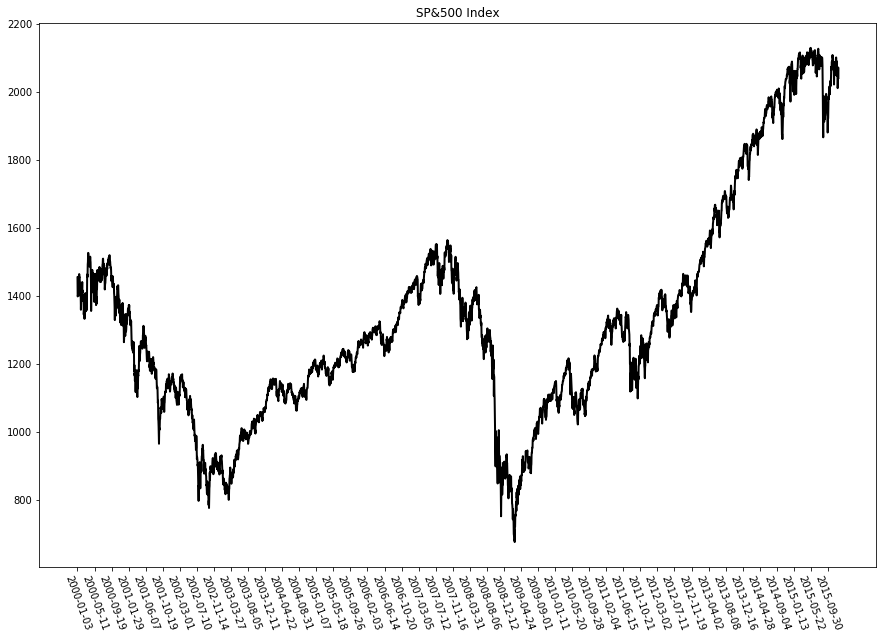

In [4]:
fig, ax = plt.subplots(figsize=(15,10))
#设置图纸
ax.set_title('SP&500 Index')
#主题
ax.plot(sp['Close'],color = 'k',linewidth = 2)
#画图
ax.set_xticks(np.arange(0,len(sp),90))
#设置x轴范围
ax.set_xticklabels([sp['Date'][x] for x in sp[['Date']].index if x % 90 == 0], rotation=-70)
#设置x轴名字

## 数据探索&数据处理

In [5]:
ipos = pd.read_csv('ipo_data.csv', encoding='latin-1')
ipos.head()

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,2002/1/28,Synaptics,SYNA,Bear Stearns,$11.00,$13.11,$13.11,19.18%,$2.11,$2.11,2,NaN
1,2002/2/1,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,$12.00,$12.01,$12.05,0.42%,$0.01,$0.05,1,NaN
2,2002/2/1,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,$28.00,$30.05,$29.10,3.93%,$2.05,$1.10,3,NaN
3,2002/2/5,Sunoco Logistics Partners,SXL,Lehman Brothers,$20.25,$21.25,$22.10,9.14%,$1.00,$1.85,3,NaN
4,2002/2/7,ManTech International,MANT,Jefferies,$16.00,$17.10,$18.21,13.81%,$1.10,$2.21,3,NaN


In [6]:
ipos= ipos.applymap(lambda x: x if not '$' in str(x) else x.replace('$',''))
ipos= ipos.applymap(lambda x: x if not '%' in str(x) else x.replace('%',''))
ipos.head()

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed
0,2002/1/28,Synaptics,SYNA,Bear Stearns,11.00,13.11,13.11,19.18,2.11,2.11,2,NaN
1,2002/2/1,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,12.00,12.01,12.05,0.42,0.01,0.05,1,NaN
2,2002/2/1,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,28.00,30.05,29.10,3.93,2.05,1.10,3,NaN
3,2002/2/5,Sunoco Logistics Partners,SXL,Lehman Brothers,20.25,21.25,22.10,9.14,1.00,1.85,3,NaN
4,2002/2/7,ManTech International,MANT,Jefferies,16.00,17.10,18.21,13.81,1.10,2.21,3,NaN


In [7]:
ipos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      2329 non-null   object
 1   Issuer                    2329 non-null   object
 2   Symbol                    2329 non-null   object
 3   Lead/Joint-Lead Managers  2329 non-null   object
 4   Offer Price               2329 non-null   object
 5   Opening Price             2329 non-null   object
 6   1st Day Close             2329 non-null   object
 7   1st Day % Px Chng         2329 non-null   object
 8   $ Chg Opening             2329 non-null   object
 9   $ Chg Close               2329 non-null   object
 10  Star Ratings              2329 non-null   object
 11  Performed                 259 non-null    object
dtypes: object(12)
memory usage: 218.5+ KB


In [8]:
#处理异常值
ipos.replace('N/C','0',inplace = True)

#ipos[ipos['Date']=='11/120']
ipos.loc[1660, 'Date'] = pd.to_datetime('2012-11-20')

#更改数据类型
ipos['Date'] = pd.to_datetime(ipos['Date'])
ipos['Offer Price'] = ipos['Offer Price'].astype('float')
ipos['Opening Price'] = ipos['Opening Price'].astype('float')
ipos['1st Day Close'] = ipos['1st Day Close'].astype('float')
ipos['1st Day % Px Chng'] = ipos['1st Day % Px Chng'].astype('float')
ipos['$ Chg Close'] = ipos['$ Chg Close'].astype('float')
ipos['$ Chg Opening'] = ipos['$ Chg Opening'].astype('float')
ipos['Star Ratings'] = ipos['Star Ratings'].astype('int')

ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      2329 non-null   datetime64[ns]
 1   Issuer                    2329 non-null   object        
 2   Symbol                    2329 non-null   object        
 3   Lead/Joint-Lead Managers  2329 non-null   object        
 4   Offer Price               2329 non-null   float64       
 5   Opening Price             2329 non-null   float64       
 6   1st Day Close             2329 non-null   float64       
 7   1st Day % Px Chng         2329 non-null   float64       
 8   $ Chg Opening             2329 non-null   float64       
 9   $ Chg Close               2329 non-null   float64       
 10  Star Ratings              2329 non-null   int32         
 11  Performed                 259 non-null    object        
dtypes: datetime64[ns](1)

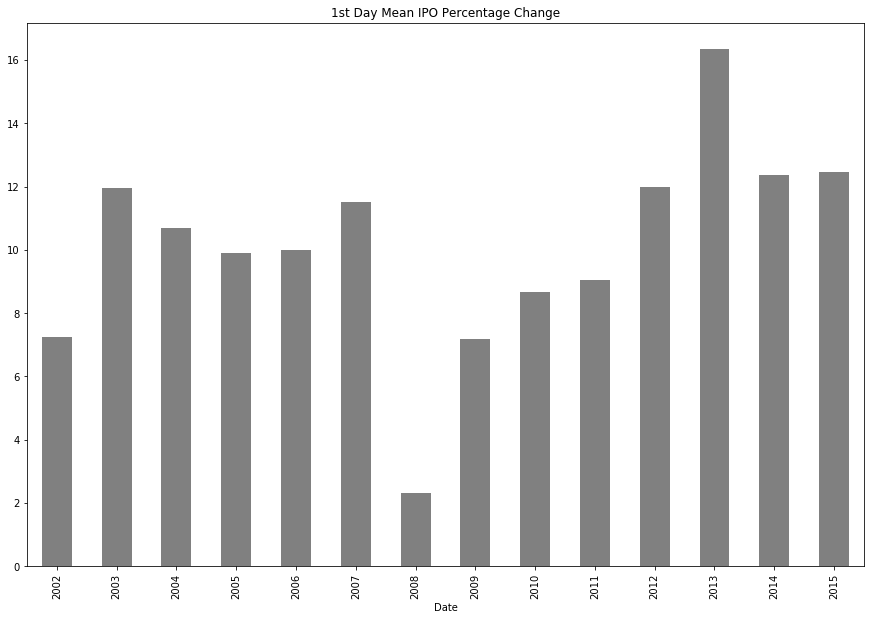

In [9]:
#数据探索
#年均第一天平均收益百分比
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng'].mean().plot(kind = 'bar',figsize = (15,10),
                                                                   color = 'grey',title = '1st Day Mean IPO Percentage Change')

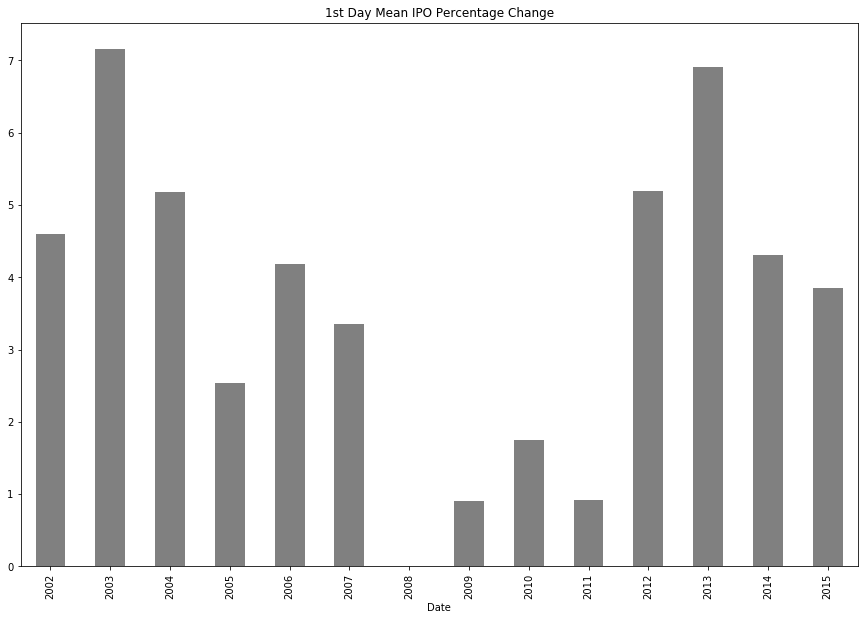

In [10]:
#第一天收益百分比中位数
ipos.groupby(ipos['Date'].dt.year)['1st Day % Px Chng'].median().plot(kind = 'bar',figsize = (15,10),
                                                                       color = 'grey',title = '1st Day Mean IPO Percentage Change')
                       

In [11]:
ipos['1st Day % Px Chng'].describe()

count    2329.000000
mean       11.008429
std        22.617572
min       -35.220000
25%         0.000000
50%         3.670000
75%        16.670000
max       353.850000
Name: 1st Day % Px Chng, dtype: float64

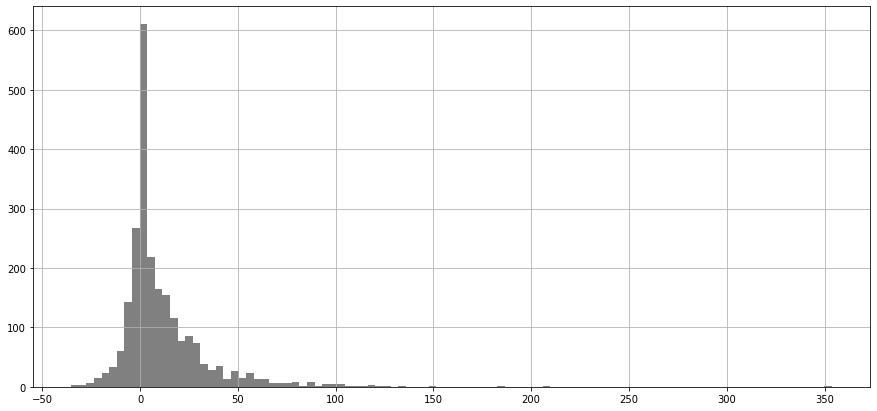

In [12]:
ipos['1st Day % Px Chng'].hist(figsize=(15,7),bins = 100,color = 'grey')

In [13]:
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100
ipos.head()

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
0,2002-01-28,Synaptics,SYNA,Bear Stearns,11.00,13.11,13.11,19.18,2.11,2.11,2,NaN,0.00,0.000000
1,2002-02-01,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,12.00,12.01,12.05,0.42,0.01,0.05,1,NaN,0.04,0.333056
2,2002-02-01,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,28.00,30.05,29.10,3.93,2.05,1.10,3,NaN,-0.95,-3.161398
3,2002-02-05,Sunoco Logistics Partners,SXL,Lehman Brothers,20.25,21.25,22.10,9.14,1.00,1.85,3,NaN,0.85,4.000000
4,2002-02-07,ManTech International,MANT,Jefferies,16.00,17.10,18.21,13.81,1.10,2.21,3,NaN,1.11,6.491228


In [14]:
ipos['% Chg Open to Close'].describe()
#出现新股开盘下跌99%，不正常，处理

count    2329.000000
mean        0.799005
std         9.387540
min       -98.522167
25%        -2.823920
50%         0.000000
75%         3.686636
max       113.333333
Name: % Chg Open to Close, dtype: float64

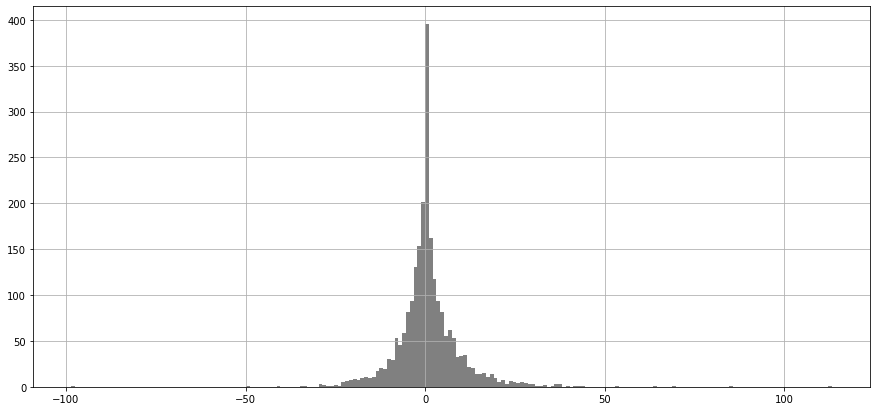

In [15]:
ipos['% Chg Open to Close'].hist(figsize = (15,7), bins = 200, color = 'grey')

In [16]:
#处理-98
ipos[ipos['% Chg Open to Close']<-98]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
440,2005-04-18,Terra Nova Acquisition,TNVAU,EarlyBird Capital,6.0,6.09,6.22,3.67,6.22,0.22,1,NaN,-6.0,-98.522167


In [17]:
ipos.loc[440, '$ Chg Opening'] = .09
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100
ipos['% Chg Open to Close'].describe()

count    2329.000000
mean        0.842224
std         9.159007
min       -49.281222
25%        -2.820513
50%         0.000000
75%         3.686636
max       113.333333
Name: % Chg Open to Close, dtype: float64

In [18]:
#处理-44
ipos[ipos['% Chg Open to Close']<-44]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
1264,2010-05-05,Douglas Dynamics,PLOW,Credit Suisse/ Oppenheimer,11.25,22.26,11.29,0.36,11.01,0.04,1,NaN,-10.97,-49.281222


In [19]:
ipos.loc[1264, '$ Chg Opening'] = .01
ipos.loc[1264, 'Opening Price'] = 11.26
ipos['$ Chg Open to Close'] = ipos['$ Chg Close'] - ipos['$ Chg Opening']
ipos['% Chg Open to Close'] = (ipos['$ Chg Open to Close']/ipos['Opening Price']) * 100
ipos['% Chg Open to Close'].describe()


count    2329.000000
mean        0.863498
std         9.099885
min       -40.383333
25%        -2.814570
50%         0.000000
75%         3.686636
max       113.333333
Name: % Chg Open to Close, dtype: float64

In [20]:
#Zillow开盘下跌正常，坏点处理完毕
ipos[ipos['% Chg Open to Close']<-40]

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close
1477,2011-07-20,Zillow,Z,Citi,20.0,60.0,35.77,78.85,40.0,15.77,3,NaN,-24.23,-40.383333


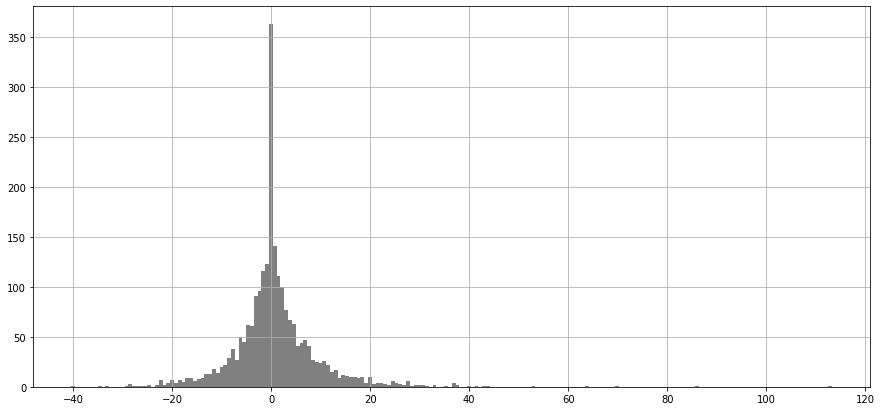

In [21]:
ipos['% Chg Open to Close'].hist(figsize = (15,7), bins = 200, color = 'grey')

In [22]:
#提取出2015年后的数据
ipos[ipos['Date']>='2015-01-01']['% Chg Open to Close'].describe()


count    141.000000
mean       0.370405
std       11.211278
min      -28.729963
25%       -4.321429
50%        0.000000
75%        3.630659
max       63.903061
Name: % Chg Open to Close, dtype: float64

In [23]:
#亏损部分
ipos[(ipos['Date']>='2015-01-01')&(ipos['$ Chg Open to Close']<0)]['$ Chg Open to Close'].describe()

count    63.000000
mean     -1.276984
std       1.394371
min      -6.160000
25%      -1.665000
50%      -0.860000
75%      -0.225000
max      -0.010000
Name: $ Chg Open to Close, dtype: float64

In [24]:
#盈利部分
ipos[(ipos['Date']>='2015-01-01')&(ipos['$ Chg Open to Close']>0)]['$ Chg Open to Close'].describe()

count    70.000000
mean      1.454857
std       2.900963
min       0.010000
25%       0.215000
50%       0.665000
75%       1.315000
max      20.040000
Name: $ Chg Open to Close, dtype: float64

## 特征工程

In [25]:
sp

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...,...
4011,2015-12-11,2047.270020,2047.270020,2008.800049,2012.369995,2012.369995,4301060000
4012,2015-12-14,2013.369995,2022.920044,1993.260010,2021.939941,2021.939941,4612440000
4013,2015-12-15,2025.550049,2053.870117,2025.550049,2043.410034,2043.410034,4353540000
4014,2015-12-16,2046.500000,2076.719971,2042.430054,2073.070068,2073.070068,4635450000


In [26]:
#加入大盘对IPO个股的影响
def get_week_chg(ipo_dt):
    try:
        day_ago_idx =  sp[sp['Date']==str(ipo_dt.date())].index[0] - 1
        week_ago_idx = sp[sp['Date']==str(ipo_dt.date())].index[0] - 8
        chg = (sp.iloc[day_ago_idx]['Close'] - \
               sp.iloc[week_ago_idx]['Close'])/(sp.iloc[week_ago_idx]['Close'])
        return chg * 100
    except:
        print('error', ipo_dt.date())
        
ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

error 2009-08-01
error 2013-11-16
error 2015-02-21
error 2015-02-21


In [27]:
ipos[ipos['Date']=='2015-02-21']

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change
2211,2015-02-21,Baozun,BZUN,Morgan Stanley/ Credit Suisse/ BofA Merrill Lynch,10.0,10.25,10.44,4.40,0.25,0.44,1,NaN,0.19,1.853659,NaN
2212,2015-02-21,Community Healthcare Trust,CHCT,Sandler ONeill + Partners/ SunTrust Robinson H...,19.0,19.00,19.75,3.95,0.00,0.75,1,NaN,0.75,3.947368,NaN


In [28]:
#出错日期当天为IPO关闭状态了，纠正
ipos.loc[1175, 'Date'] = pd.to_datetime('2009-08-12')
ipos.loc[1881, 'Date'] = pd.to_datetime('2013-11-06')
ipos.loc[2211, 'Date'] = pd.to_datetime('2015-05-21')
ipos.loc[2212, 'Date'] = pd.to_datetime('2015-05-21')

ipos['SP Week Change'] = ipos['Date'].map(get_week_chg)

In [29]:
#添加标准普尔在IPO前一天收盘到IPO首日开盘的变化百分比


def get_cto_chg(ipo_dt):
    try:
        today_open_idx = sp[sp['Date'] == str(ipo_dt.date())].index[0]
        yday_close_idx = sp[sp['Date'] == str(ipo_dt.date())].index[0]-1
        chg = (sp.iloc[today_open_idx]['Open'] - \
               sp.iloc[yday_close_idx]['Close'])/(sp.iloc[yday_close_idx]['Close'])
        return chg*100
    except:
        print('error',ipo_dt)
ipos['SP Close to Open Chg Pct'] = ipos['Date'].map(get_cto_chg)
ipos.head()

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct
0,2002-01-28,Synaptics,SYNA,Bear Stearns,11.00,13.11,13.11,19.18,2.11,2.11,2,NaN,0.00,0.000000,-1.126333,0.0
1,2002-02-01,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,12.00,12.01,12.05,0.42,0.01,0.05,1,NaN,0.04,0.333056,0.972911,0.0
2,2002-02-01,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,28.00,30.05,29.10,3.93,2.05,1.10,3,NaN,-0.95,-3.161398,0.972911,0.0
3,2002-02-05,Sunoco Logistics Partners,SXL,Lehman Brothers,20.25,21.25,22.10,9.14,1.00,1.85,3,NaN,0.85,4.000000,-3.330838,0.0
4,2002-02-07,ManTech International,MANT,Jefferies,16.00,17.10,18.21,13.81,1.10,2.21,3,NaN,1.11,6.491228,-4.373118,0.0


In [30]:
#处理承销商数据
ipos['Lead Mgr'] = ipos['Lead/Joint-Lead Managers'].map(lambda x: x.split('/')[0])
ipos['Lead Mgr'] = ipos['Lead Mgr'].map(lambda x: x.strip())

for x in pd.DataFrame(ipos['Lead Mgr'].unique(), columns=['Name']).sort_values('Name')['Name']:
    print(x)


A.G. Edwards
A.G. Edwrads & Sons
AG Edwards
AG Edwards & Sons
AG Edwrads
Adams Harkness
Advest
Aegis Capital
Aegis Capital Corp
Aegis Capital Corp.
Anderson & Strudrick
Axiom Capital Management
BB&T Capital Markets
BMO Capital Markets
Baird
Baird, BMO Capital Markets, Janney Montgomery Scott
Banc of America
Banc of America Securities
Barclay Capital
Barclays
Barclays Capital
Bear Stearns
Bear Streans
BoA Merrill Lynch
BofA
BofA Merril Lynch
BofA Merrill Lych
BofA Merrill Lynch
Broadband Capital Management
Broadband Capital Management LLC
Burnham Securities
C&Co
C.E. Unterberg, Towbin
CIBC World Markets
CIBC Worldwide
CRT Capital
CRT Capital Group
CS First Boston
CSFirst Boston
Canaccord Genuity
Cantor Fitzgerald
Cantor Fitzgerald & Co.
Capital Growth Financial
Casimir Capital
Chardan Capital Markets
China Inter'l
China International
Cit
Citi
Citigroup
Cohen
Cohen & Company Capital Markets, LLC   I-Bankers Securities
Cowen
Cowen and Company
Craig-Hallum Capital
Credit Suisse
Credit Suis

In [31]:
#承销商有重复值，进行清理合并
ipos.loc[ipos['Lead Mgr'].str.contains('Hambrecht'),'Lead Mgr'] = 'WR Hambrecht+Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwards'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Edwrads'), 'Lead Mgr'] = 'AG Edwards'

ipos.loc[ipos['Lead Mgr'].str.contains('Barclay'), 'Lead Mgr'] = 'Barclays'

ipos.loc[ipos['Lead Mgr'].str.contains('Aegis'), 'Lead Mgr'] = 'Aegis Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Deutsche'), 'Lead Mgr'] = 'Deutsche Bank'

ipos.loc[ipos['Lead Mgr'].str.contains('Suisse'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('CS.?F'), 'Lead Mgr'] = 'CSFB'

ipos.loc[ipos['Lead Mgr'].str.contains('^Early'), 'Lead Mgr'] = 'EarlyBirdCapital'

ipos.loc[325,'Lead Mgr'] = 'Maximum Captial'

ipos.loc[ipos['Lead Mgr'].str.contains('Keefe'), 'Lead Mgr'] = 'Keefe, Bruyette & Woods'

ipos.loc[ipos['Lead Mgr'].str.contains('Stan'), 'Lead Mgr'] = 'Morgan Stanley'

ipos.loc[ipos['Lead Mgr'].str.contains('P. Morg'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('PM'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('J\.P\.'), 'Lead Mgr'] = 'JP Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Banc of'), 'Lead Mgr'] = 'Banc of America'

ipos.loc[ipos['Lead Mgr'].str.contains('Lych'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merrill$'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Lymch'), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('A Merril Lynch'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Merril '), 'Lead Mgr'] = 'Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('BofA$'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('SANDLER'), 'Lead Mgr'] = 'Sandler O\'neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Sandler'), 'Lead Mgr'] = 'Sandler O\'Neil + Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Renshaw'), 'Lead Mgr'] = 'Rodman & Renshaw'

ipos.loc[ipos['Lead Mgr'].str.contains('Baird'), 'Lead Mgr'] = 'RW Baird'

ipos.loc[ipos['Lead Mgr'].str.contains('Cantor'), 'Lead Mgr'] = 'Cantor Fitzgerald'

ipos.loc[ipos['Lead Mgr'].str.contains('Goldman'), 'Lead Mgr'] = 'Goldman Sachs'

ipos.loc[ipos['Lead Mgr'].str.contains('Bear'), 'Lead Mgr'] = 'Bear Stearns'

ipos.loc[ipos['Lead Mgr'].str.contains('BoA'), 'Lead Mgr'] = 'BofA Merrill Lynch'

ipos.loc[ipos['Lead Mgr'].str.contains('Broadband'), 'Lead Mgr'] = 'Broadband Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Davidson'), 'Lead Mgr'] = 'DA Davidson'

ipos.loc[ipos['Lead Mgr'].str.contains('Feltl'), 'Lead Mgr'] = 'Feltl & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('China'), 'Lead Mgr'] = 'China International'

ipos.loc[ipos['Lead Mgr'].str.contains('Cit'), 'Lead Mgr'] = 'Citigroup'

ipos.loc[ipos['Lead Mgr'].str.contains('Ferris'), 'Lead Mgr'] = 'Ferris Baker Watts'

ipos.loc[ipos['Lead Mgr'].str.contains('Friedman|Freidman|FBR'), 'Lead Mgr'] = 'Friedman Billings Ramsey'

ipos.loc[ipos['Lead Mgr'].str.contains('^I-'), 'Lead Mgr'] = 'I-Bankers'

ipos.loc[ipos['Lead Mgr'].str.contains('Gunn'), 'Lead Mgr'] = 'Gunn Allen'

ipos.loc[ipos['Lead Mgr'].str.contains('Jeffer'), 'Lead Mgr'] = 'Jefferies'

ipos.loc[ipos['Lead Mgr'].str.contains('Oppen'), 'Lead Mgr'] = 'Oppenheimer'

ipos.loc[ipos['Lead Mgr'].str.contains('JMP'), 'Lead Mgr'] = 'JMP Securities'

ipos.loc[ipos['Lead Mgr'].str.contains('Rice'), 'Lead Mgr'] = 'Johnson Rice'

ipos.loc[ipos['Lead Mgr'].str.contains('Ladenburg'), 'Lead Mgr'] = 'Ladenburg Thalmann'

ipos.loc[ipos['Lead Mgr'].str.contains('Piper'), 'Lead Mgr'] = 'Piper Jaffray'

ipos.loc[ipos['Lead Mgr'].str.contains('Pali'), 'Lead Mgr'] = 'Pali Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Paulson'), 'Lead Mgr'] = 'Paulson Investment Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Roth'), 'Lead Mgr'] = 'Roth Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('Stifel'), 'Lead Mgr'] = 'Stifel Nicolaus'

ipos.loc[ipos['Lead Mgr'].str.contains('SunTrust'), 'Lead Mgr'] = 'SunTrust Robinson'

ipos.loc[ipos['Lead Mgr'].str.contains('Wachovia'), 'Lead Mgr'] = 'Wachovia'

ipos.loc[ipos['Lead Mgr'].str.contains('Wedbush'), 'Lead Mgr'] = 'Wedbush Morgan'

ipos.loc[ipos['Lead Mgr'].str.contains('Blair'), 'Lead Mgr'] = 'William Blair'

ipos.loc[ipos['Lead Mgr'].str.contains('Wunderlich'), 'Lead Mgr'] = 'Wunderlich'

ipos.loc[ipos['Lead Mgr'].str.contains('Max'), 'Lead Mgr'] = 'Maxim Group'

ipos.loc[ipos['Lead Mgr'].str.contains('CIBC'), 'Lead Mgr'] = 'CIBC'

ipos.loc[ipos['Lead Mgr'].str.contains('CRT'), 'Lead Mgr'] = 'CRT Capital'

ipos.loc[ipos['Lead Mgr'].str.contains('HCF'),'Lead Mgr'] = 'HCFP Brenner'

ipos.loc[ipos['Lead Mgr'].str.contains('Cohen'), 'Lead Mgr']  = 'Cohen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Cowen'), 'Lead Mgr'] = 'Cowen & Co.'

ipos.loc[ipos['Lead Mgr'].str.contains('Leerink'), 'Lead Mgr']  = 'Leerink Partners'

ipos.loc[ipos['Lead Mgr'].str.contains('Lynch\xca'), 'Lead Mgr'] = 'Merrill Lynch'


In [32]:
for x in pd.DataFrame(ipos['Lead Mgr'].unique(), columns=['Name']).sort_values('Name')['Name']:
    print(x)

AG Edwards
Adams Harkness
Advest
Aegis Capital
Anderson & Strudrick
Axiom Capital Management
BB&T Capital Markets
BMO Capital Markets
Banc of America
Barclays
Bear Stearns
BofA Merrill Lynch
Broadband Capital
Burnham Securities
C&Co
C.E. Unterberg, Towbin
CIBC
CRT Capital
CSFB
Canaccord Genuity
Cantor Fitzgerald
Capital Growth Financial
Casimir Capital
Chardan Capital Markets
China International
Citigroup
Cohen & Co.
Cowen & Co.
Craig-Hallum Capital
DA Davidson
Dawson James Securities
Deutsche Bank
EarlyBirdCapital
FIG Partners
FTN Midwest Securities
Feltl & Co.
Ferris Baker Watts
First Albany
Friedman Billings Ramsey
Gilford Securities
Global Hunter Securities, LLC
Goldman Sachs
Gunn Allen
HCFP Brenner
I-Bankers
ING Barings
Imperial Capital
JMP Securities
JP Morgan
JP Turner
Janney Montgomery Scott
Jefferies
Johnson Rice
Keefe, Bruyette & Woods
KeyBanc Capital Markets
LG Investment & Securities
Ladenburg Thalmann
Laidlaw & Company (UK) Ltd.
Lazard Capital Markets
Leerink Partners
Legg

In [33]:
#增加承销商的数量
ipos['Total Underwriters'] = ipos['Lead/Joint-Lead Managers'].map(lambda x:len(x.split('/')))
#加入日期相关特征

ipos['Week Day'] = ipos['Date'].dt.dayofweek.map({0:'Mon', 1:'Tues', 2:'Wed',\
                                                  3:'Thurs', 4:'Fri', 5:'Sat', 6:'Sun'})
ipos['Month'] = ipos['Date'].map(lambda x : x.month)
ipos['Month'] = ipos['Month'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',7:'Jul',\
                                   8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

ipos.head()

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,Star Ratings,Performed,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month
0,2002-01-28,Synaptics,SYNA,Bear Stearns,11.00,13.11,13.11,19.18,2.11,2.11,2,NaN,0.00,0.000000,-1.126333,0.0,Bear Stearns,1,Mon,Jan
1,2002-02-01,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,12.00,12.01,12.05,0.42,0.01,0.05,1,NaN,0.04,0.333056,0.972911,0.0,Lehman Brothers,2,Fri,Feb
2,2002-02-01,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,28.00,30.05,29.10,3.93,2.05,1.10,3,NaN,-0.95,-3.161398,0.972911,0.0,Salomon Smith Barney,2,Fri,Feb
3,2002-02-05,Sunoco Logistics Partners,SXL,Lehman Brothers,20.25,21.25,22.10,9.14,1.00,1.85,3,NaN,0.85,4.000000,-3.330838,0.0,Lehman Brothers,1,Tues,Feb
4,2002-02-07,ManTech International,MANT,Jefferies,16.00,17.10,18.21,13.81,1.10,2.21,3,NaN,1.11,6.491228,-4.373118,0.0,Jefferies,1,Thurs,Feb


In [34]:
#补充价格变化特征
ipos['Gap Open Pct'] = (ipos['$ Chg Opening'].astype('float')/ipos['Opening Price'].astype('float')) * 100
ipos['Open to Close Pct'] = (ipos['$ Chg Close'].astype('float') -\
                             ipos['$ Chg Opening'].astype('float'))/\
                             ipos['Opening Price'].astype('float') * 100

ipos.head()

,Date,Issuer,Symbol,Lead/Joint-Lead Managers,Offer Price,Opening Price,1st Day Close,1st Day % Px Chng,$ Chg Opening,$ Chg Close,...,$ Chg Open to Close,% Chg Open to Close,SP Week Change,SP Close to Open Chg Pct,Lead Mgr,Total Underwriters,Week Day,Month,Gap Open Pct,Open to Close Pct
0,2002-01-28,Synaptics,SYNA,Bear Stearns,11.00,13.11,13.11,19.18,2.11,2.11,...,0.00,0.000000,-1.126333,0.0,Bear Stearns,1,Mon,Jan,16.094584,0.000000
1,2002-02-01,ZymoGenetics,ZGEN,Lehman Brothers/Merrill Lynch,12.00,12.01,12.05,0.42,0.01,0.05,...,0.04,0.333056,0.972911,0.0,Lehman Brothers,2,Fri,Feb,0.083264,0.333056
2,2002-02-01,Carolina Group (Loews Corp.),CG,Salomon Smith Barney/Morgan Stanley,28.00,30.05,29.10,3.93,2.05,1.10,...,-0.95,-3.161398,0.972911,0.0,Salomon Smith Barney,2,Fri,Feb,6.821963,-3.161398
3,2002-02-05,Sunoco Logistics Partners,SXL,Lehman Brothers,20.25,21.25,22.10,9.14,1.00,1.85,...,0.85,4.000000,-3.330838,0.0,Lehman Brothers,1,Tues,Feb,4.705882,4.000000
4,2002-02-07,ManTech International,MANT,Jefferies,16.00,17.10,18.21,13.81,1.10,2.21,...,1.11,6.491228,-4.373118,0.0,Jefferies,1,Thurs,Feb,6.432749,6.491228


In [35]:
ipos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      2329 non-null   datetime64[ns]
 1   Issuer                    2329 non-null   object        
 2   Symbol                    2329 non-null   object        
 3   Lead/Joint-Lead Managers  2329 non-null   object        
 4   Offer Price               2329 non-null   float64       
 5   Opening Price             2329 non-null   float64       
 6   1st Day Close             2329 non-null   float64       
 7   1st Day % Px Chng         2329 non-null   float64       
 8   $ Chg Opening             2329 non-null   float64       
 9   $ Chg Close               2329 non-null   float64       
 10  Star Ratings              2329 non-null   int32         
 11  Performed                 259 non-null    object        
 12  $ Chg Open to Close 

In [36]:
#通过patsy库可以将原始数据转化为适用于统计模型构建的矩阵

from patsy import dmatrix

X = dmatrix('Month + Q("Week Day") + Q("Total Underwriters") + Q("Gap Open Pct") + Q("$ Chg Opening") +\
                  Q("Lead Mgr") + Q("Offer Price") + Q("Opening Price") +\
                  Q("SP Close to Open Chg Pct") + Q("SP Week Change")', data=ipos, return_type='dataframe')
X.head()

,Intercept,Month[T.Aug],Month[T.Dec],Month[T.Feb],Month[T.Jan],Month[T.Jul],Month[T.Jun],Month[T.Mar],Month[T.May],Month[T.Nov],...,"Q(""Lead Mgr"")[T.WestPark Capital]","Q(""Lead Mgr"")[T.William Blair]","Q(""Lead Mgr"")[T.Wunderlich]","Q(""Total Underwriters"")","Q(""Gap Open Pct"")","Q(""$ Chg Opening"")","Q(""Offer Price"")","Q(""Opening Price"")","Q(""SP Close to Open Chg Pct"")","Q(""SP Week Change"")"
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,16.094584,2.11,11.00,13.11,0.0,-1.126333
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.083264,0.01,12.00,12.01,0.0,0.972911
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,6.821963,2.05,28.00,30.05,0.0,0.972911
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,4.705882,1.00,20.25,21.25,0.0,-3.330838
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,6.432749,1.10,16.00,17.10,0.0,-4.373118


In [48]:
print(X.shape)

(2329, 132)


## 建模分类

In [78]:
#首先构建训练和测试集，通过构建逻辑回归预测IPO股票是否值得购买
from sklearn.model_selection import train_test_split

X['Buy_pred'] = ipos['$ Chg Open to Close'].map(lambda x: 1 if x >= 1 else 0)

X_data = X.iloc[:,:-1]
y_data = X['Buy_pred']

x_train,x_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.3)


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1630, 132)
(1630,)
(699, 132)
(699,)


In [79]:
clf = linear_model.LogisticRegression()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

C:\Users\VincentZhou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8555078683834049

In [115]:
#获取回归系数
fv = pd.DataFrame(_flatten(clf.coef_.T.tolist()),x_train.columns.tolist()).reset_index()
fv.columns = ['Feature','Coef']
fv.sort_values(by='Coef',ascending=False).reset_index(drop = True)


,Feature,Coef
0,"Q(""Lead Mgr"")[T.Bear Stearns]",1.292781
1,"Q(""Lead Mgr"")[T.Wachovia]",0.872368
2,"Q(""Lead Mgr"")[T.Piper Jaffray]",0.698136
3,"Q(""Lead Mgr"")[T.Goldman Sachs]",0.695968
4,"Q(""Lead Mgr"")[T.BMO Capital Markets]",0.690914
...,...,...
127,"Q(""SP Close to Open Chg Pct"")",-0.744978
128,Month[T.Jan],-0.757984
129,"Q(""Lead Mgr"")[T.EarlyBirdCapital]",-0.803394
130,"Q(""Lead Mgr"")[T.Sandler O'Neil + Partners]",-1.014764


In [70]:
pred_label = clf.predict(x_test)
results = []

for pl, tl, idx, chg in zip(pred_label,y_test,y_test.index,ipos.iloc[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx,chg,pl,tl,1])
    else:
        results.append([idx,chg,pl,tl,0])
rf = pd.DataFrame(results, columns=['index','$ chg','predicted','actual','correct'])
rf.head()

,index,$ chg,predicted,actual,correct
0,875,-3.00,0,0,1
1,1733,-0.50,0,0,1
2,1996,-0.25,0,0,1
3,660,0.60,0,0,1
4,2132,0.20,0,0,1


In [71]:
rf[rf['predicted']==1]['$ chg'].describe()

count    32.00000
mean      0.38500
std       4.78468
min      -5.72000
25%      -2.04250
50%      -0.96500
75%       2.07500
max      16.00000
Name: $ chg, dtype: float64

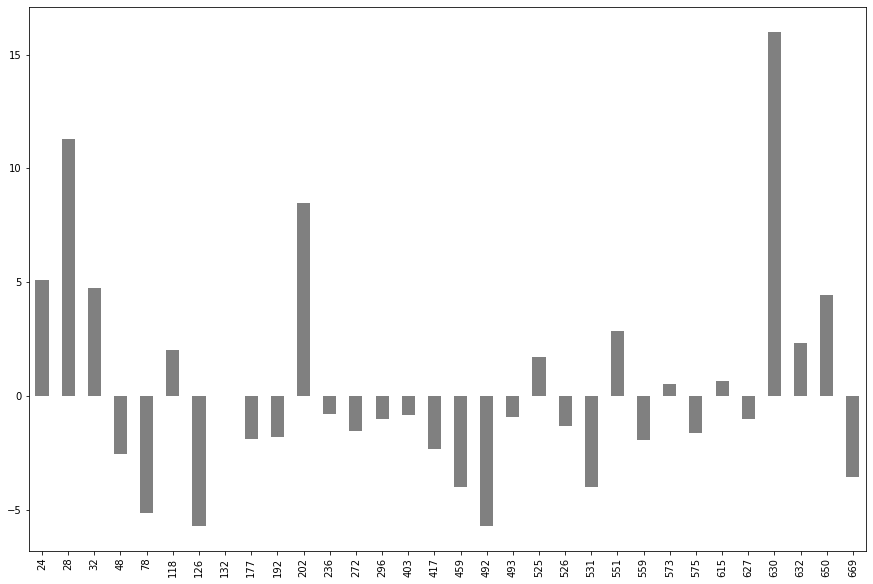

In [72]:
fig, ax = plt.subplots(figsize = (15,10))
rf[rf['predicted']==1]['$ chg'].plot(kind = 'bar',color = 'grey')


In [76]:
#改变阈值

X['Buy_pred'] = ipos['$ Chg Open to Close'].map(lambda x: 1 if x >= .25 else 0)

X_data = X.iloc[:,:-1]
y_data = X['Buy_pred']

x_train,x_test,y_train,y_test = train_test_split(X_data,y_data,test_size=0.3)


clf = linear_model.LogisticRegression()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)


C:\Users\VincentZhou\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6251788268955651

In [77]:
pred_label = clf.predict(x_test)
results = []

for pl, tl, idx, chg in zip(pred_label,y_test,y_test.index,ipos.iloc[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results.append([idx,chg,pl,tl,1])
    else:
        results.append([idx,chg,pl,tl,0])
rf = pd.DataFrame(results, columns=['index','$ chg','predicted','actual','correct'])
rf.head()

,index,$ chg,predicted,actual,correct
0,351,0.00,0,0,1
1,371,-2.26,0,0,1
2,297,0.80,0,1,0
3,762,0.50,0,1,0
4,382,2.00,1,1,1


In [74]:
rf[rf['predicted']==1]['$ chg'].describe()

count    65.000000
mean      0.984462
std       7.511874
min      -5.080000
25%      -1.150000
50%      -0.250000
75%       1.790000
max      56.540000
Name: $ chg, dtype: float64

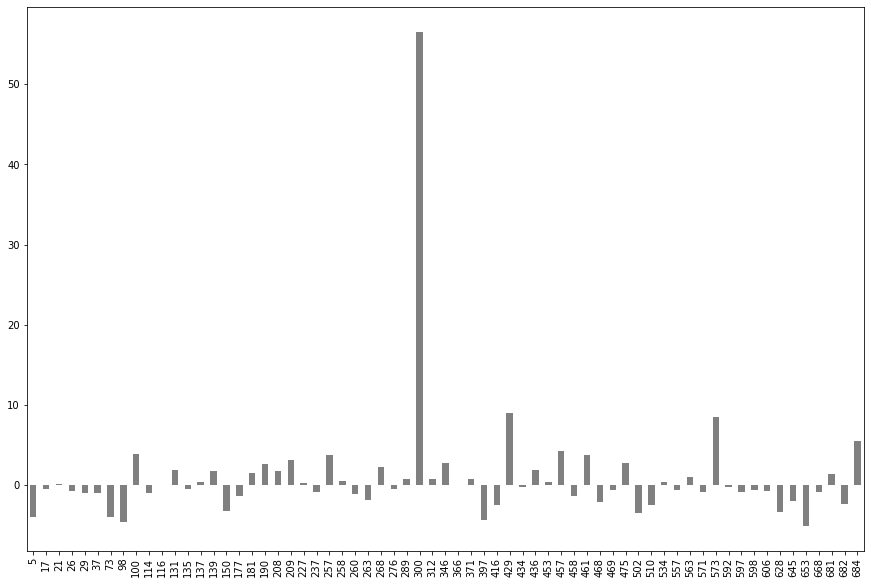

In [75]:
fig, ax = plt.subplots(figsize = (15,10))
rf[rf['predicted']==1]['$ chg'].plot(kind = 'bar',color = 'grey')


In [117]:
#随机森林拟合
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=5000)
model = clf_rf.fit(x_train, y_train)
clf_rf.score(x_test, y_test)


0.8454935622317596

In [119]:
pred_label_rf = model.predict(x_test)

results_rf=[]
for pl, tl, idx, chg in zip(pred_label_rf, y_test, y_test.index, ipos.iloc[y_test.index]['$ Chg Open to Close']):
    if pl == tl:
        results_rf.append([idx, chg, pl, tl, 1])
    else:
        results_rf.append([idx, chg, pl, tl, 0])
rf2 = pd.DataFrame(results_rf, columns=['index', '$ chg', 'predicted', 'actual', 'correct'])
rf2.sort_values('$ chg', ascending=False)

,index,$ chg,predicted,actual,correct
150,2274,20.04,1,1,1
417,1911,16.00,0,1,0
335,2102,13.60,0,1,0
464,1452,11.25,0,1,0
0,143,9.93,0,1,0
...,...,...,...,...,...
21,1748,-3.06,0,0,1
402,1813,-3.85,1,0,0
161,2231,-4.53,0,0,1
503,1975,-6.00,1,0,0


In [120]:
rf2[rf2['predicted']==1]['$ chg'].sum()

12.790000000000003

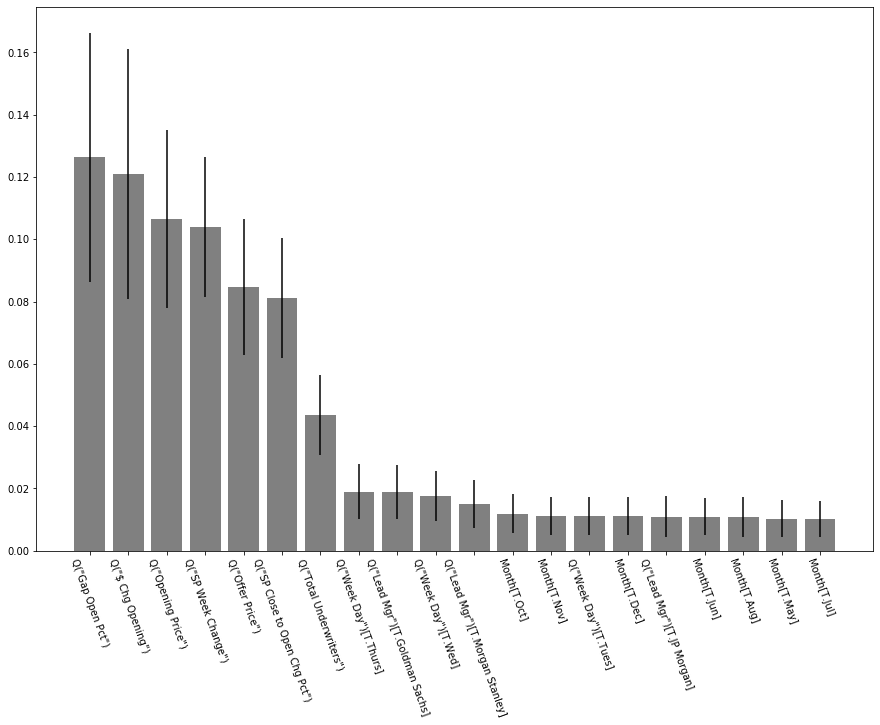

In [122]:
#随机森林可以现实各个有效因子的重要程度

f_importances = clf_rf.feature_importances_
f_names = x_train
f_std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_], axis=0)

zz = zip(f_importances, f_names, f_std)
zzs = sorted(zz, key=lambda x: x[0], reverse=True)

imps = [x[0] for x in zzs[:20]]
labels = [x[1] for x in zzs[:20]]
errs = [x[2] for x in zzs[:20]]

plt.subplots(figsize=(15,10))
plt.bar(range(20), imps, color="grey", yerr=errs, align="center")
plt.xticks(range(20), labels, rotation=-70);